### Telecom Churn: Logistic Regression with PCA
With 226 predictor variables, we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, customer attrition is referred to as 'churn'.

In [43]:
#downloading data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
tel_df = pd.read_csv("telecom_churn_data.csv")
tel_df.set_index("mobile_number",inplace = True)
tel_df.drop(columns = ["circle_id","loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou",
                       "last_date_of_month_6","last_date_of_month_7",
                       "last_date_of_month_8","last_date_of_month_9"],inplace = True)

tel_df["avg_rev_3_months"] = tel_df[["arpu_6","arpu_7","arpu_8"]].mean(axis = 1).round(0)

Lets Understand datastructure after removing unwanted columns

In [44]:
tel_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rev_3_months
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,209.0
7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,...,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,219.0
7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,...,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,189.0
7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,...,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,327.0
7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,...,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,270.0


In [45]:
#classifying users based on usage
def bin_cal(x):
    if x > 0:
        return 1
    else:
        return 0
for i in  tel_df[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]]:
    tel_df["tel_9_churn"] = tel_df[i].apply(bin_cal)

In [46]:
tel_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rev_3_months,tel_9_churn
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,...,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,209.0,0
7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,...,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,219.0,0
7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,...,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,189.0,1
7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,...,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,327.0,0
7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,...,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,270.0,0


In [47]:
r = tel_df.columns.tolist()

In [48]:
#removing attributes of 9th month
s = []
for i in r:
    if i.endswith("9"):
        s.append(i)
print(s)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [49]:
tel_df.drop(columns = s,inplace = True)

In [50]:
tel_df.drop(columns = 'sep_vbc_3g',inplace = True)

In [51]:
tel_df_new = tel_df[(tel_df["avg_rev_3_months"]>315)]

In [52]:
tel_df_new.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rev_3_months,tel_9_churn
mobile_number,,,,,,,,,,,,,,,,,,,,,
7001204172,221.338,251.102,508.054,99.91,54.39,310.98,123.31,109.01,71.68,0.00,...,0,NaN,NaN,NaN,2491,0.00,0.00,0.00,327.0,0
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1864.0,0
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,NaN,1.0,1.0,315,21.03,910.65,122.16,336.0,0
7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0,NaN,NaN,1.0,2607,0.00,0.00,0.00,431.0,0
7002070365,31.000,510.465,590.643,NaN,246.56,280.31,NaN,839.58,1011.91,NaN,...,0,NaN,NaN,NaN,270,0.00,0.00,0.00,377.0,0


In [53]:
tel_df_new.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29768 entries, 7001204172 to 7000498689
Data columns (total 165 columns):
arpu_6                      29768 non-null float64
arpu_7                      29768 non-null float64
arpu_8                      29768 non-null float64
onnet_mou_6                 29328 non-null float64
onnet_mou_7                 29506 non-null float64
onnet_mou_8                 29225 non-null float64
offnet_mou_6                29328 non-null float64
offnet_mou_7                29506 non-null float64
offnet_mou_8                29225 non-null float64
roam_ic_mou_6               29328 non-null float64
roam_ic_mou_7               29506 non-null float64
roam_ic_mou_8               29225 non-null float64
roam_og_mou_6               29328 non-null float64
roam_og_mou_7               29506 non-null float64
roam_og_mou_8               29225 non-null float64
loc_og_t2t_mou_6            29328 non-null float64
loc_og_t2t_mou_7            29506 non-null float64
loc_og_t2

In [54]:
int_list = ["date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8",
            "total_rech_data_6","total_rech_data_7","total_rech_data_8","max_rech_data_6","max_rech_data_7",
            "max_rech_data_8","count_rech_2g_6","count_rech_2g_7","count_rech_2g_8","count_rech_3g_6","count_rech_3g_7",
            "count_rech_3g_8","av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","vol_2g_mb_6","vol_2g_mb_7",
            "vol_2g_mb_8","vol_3g_mb_6","vol_3g_mb_7","vol_3g_mb_8","arpu_3g_6","arpu_3g_7","arpu_3g_8","arpu_2g_6",
            "arpu_2g_7","arpu_2g_8","night_pck_user_6","night_pck_user_7","night_pck_user_8","monthly_2g_6",
            "monthly_2g_7","monthly_2g_8","sachet_2g_6","sachet_2g_7","sachet_2g_8","monthly_3g_6","monthly_3g_7"
            ,"monthly_3g_8","sachet_3g_6","sachet_3g_7","sachet_3g_8","fb_user_6","fb_user_7","fb_user_8"]
for i in int_list:
    tel_df_new[i].fillna(0,inplace = True)
tel_df_new.dropna(how = "any",inplace = True)
tel_df_new.info(verbose = True, null_counts =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28562 entries, 7001204172 to 7000498689
Data columns (total 165 columns):
arpu_6                      28562 non-null float64
arpu_7                      28562 non-null float64
arpu_8                      28562 non-null float64
onnet_mou_6                 28562 non-null float64
onnet_mou_7                 28562 non-null float64
onnet_mou_8                 28562 non-null float64
offnet_mou_6                28562 non-null float64
offnet_mou_7                28562 non-null float64
offnet_mou_8                28562 non-null float64
roam_ic_mou_6               28562 non-null float64
roam_ic_mou_7               28562 non-null float64
roam_ic_mou_8               28562 non-null float64
roam_og_mou_6               28562 non-null float64
roam_og_mou_7               28562 non-null float64
roam_og_mou_8               28562 non-null float64
loc_og_t2t_mou_6            28562 non-null float64
loc_og_t2t_mou_7            28562 non-null float64
loc_og_t2

In [55]:
#deriving attributes using last date of recharge
date_time = ["date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","date_of_last_rech_6",
             "date_of_last_rech_7","date_of_last_rech_8"]
for i in date_time:
    tel_df_new[i] = pd.to_datetime(tel_df_new[i])
tel_df_new["amt_date_1"] = tel_df_new["date_of_last_rech_7"]- tel_df_new["date_of_last_rech_6"]
tel_df_new["amt_date_2"] = tel_df_new["date_of_last_rech_8"]- tel_df_new["date_of_last_rech_7"]
tel_df_new["amt_date_1"] = pd.to_numeric(tel_df_new["amt_date_1"].dt.days, downcast='integer')
tel_df_new["amt_date_2"] = pd.to_numeric(tel_df_new["amt_date_2"].dt.days, downcast='integer')
tel_df_new["avg_rech_time"] = tel_df_new[["amt_date_1","amt_date_2"]].mean(axis =1)
tel_df_new["data_date_1"] = tel_df_new["date_of_last_rech_data_7"]- tel_df_new["date_of_last_rech_data_6"]
tel_df_new["data_date_2"] = tel_df_new["date_of_last_rech_data_8"]- tel_df_new["date_of_last_rech_data_7"]
tel_df_new["data_date_1"] = pd.to_numeric(tel_df_new["data_date_1"].dt.days, downcast='integer')
tel_df_new["data_date_2"] = pd.to_numeric(tel_df_new["data_date_2"].dt.days, downcast='integer')
def x(u):
    if u > 5000 or u <-1:
        return 31
    else:
        return u
tel_df_new["data_date_1"] = tel_df_new["data_date_1"].apply(x)
tel_df_new["data_date_2"] = tel_df_new["data_date_2"].apply(x)
tel_df_new["avg_rech_data_time"] = tel_df_new[["data_date_1","data_date_2"]].mean(axis =1)
tel_df_new[["avg_rech_data_time","avg_rech_time"]]
tel_df_new.drop(columns = ["amt_date_1","amt_date_2","data_date_1","data_date_2",
                          "date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","date_of_last_rech_6",
             "date_of_last_rech_7","date_of_last_rech_8"],inplace= True)

In [56]:
tel_df_new.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28562 entries, 7001204172 to 7000498689
Data columns (total 161 columns):
arpu_6                28562 non-null float64
arpu_7                28562 non-null float64
arpu_8                28562 non-null float64
onnet_mou_6           28562 non-null float64
onnet_mou_7           28562 non-null float64
onnet_mou_8           28562 non-null float64
offnet_mou_6          28562 non-null float64
offnet_mou_7          28562 non-null float64
offnet_mou_8          28562 non-null float64
roam_ic_mou_6         28562 non-null float64
roam_ic_mou_7         28562 non-null float64
roam_ic_mou_8         28562 non-null float64
roam_og_mou_6         28562 non-null float64
roam_og_mou_7         28562 non-null float64
roam_og_mou_8         28562 non-null float64
loc_og_t2t_mou_6      28562 non-null float64
loc_og_t2t_mou_7      28562 non-null float64
loc_og_t2t_mou_8      28562 non-null float64
loc_og_t2m_mou_6      28562 non-null float64
loc_og_t2m_mou_7     

In [57]:
#splitting data into train and split
from sklearn.model_selection import train_test_split
X = tel_df_new.drop(columns = "tel_9_churn")
y = tel_df_new["tel_9_churn"]
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [58]:
#install imblearn package if any error pops up
#using synthesised data to reduce imbalance of data
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio=0.6)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_train_smote, columns = X_train.columns)
y_train = pd.DataFrame({"tel_9_churn":y_train_smote})

In [59]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 5

### Applying Lasso Regression

In [60]:
#removing unwanted columns using lasso
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  2.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [61]:
lasso = Lasso(alpha = 12)
lasso.fit(X_train,y_train)
rr = lasso.coef_
y = X_train.columns
k = pd.DataFrame({"y":y,"rr":rr})
m = k[(k["rr"] == 0.0)]
l = m["y"].tolist()
print(l)
print(len(l))

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t

In [62]:
X_train.drop(columns = l,inplace = True)

### Applying Logistic Regression

In [63]:
#training logistic regression model
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            tel_9_churn   No. Observations:                23774
Model:                            GLM   Df Residuals:                    23761
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 04 Nov 2019   Deviance:                          nan
Time:                        21:10:42   Pearson chi2:                 9.01e+15
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.2048      0.047    -46.477      0.000      -2.298      -2.112
std_og_mou_6         -6.7e-05   6.12e-05     -1.094      0.274      -0.000     5.3e-05
std_og_mou_7          -0.0002   7.53e-05     -3.209      0.001      -0.000    -9.4e-05
std_og_mou_8          -0.0001   6.18e-05     -2.091      0.037      -0.000   -8.11e-06
total_ic_mou_8         0.0004   5.03e-05      8.187      0.000       0.000       0.001
av_rech_amt_data_6     0.0037      0.000     17.822      0.000       0.003       0.004
av_rech_amt_data_8     0.0051      0.000     23.331      0.000       0.005       0.006
vol_3g_mb_6        -2.693e-05   5.45e-05     -0.494      0.621      -0.000    7.99e-05
vol_3g_mb_7            0.0004      7e-05      6.081      0.000       0.000       0.001
vol_3g_mb_8            0.0013    8.9e-05     14.537      0.000       0.001       0.001
aon                  5.24e-05   1.97e-05      2.664      0.008    1.38e-05     9.1e-05
aug_vbc_3g             0.0015      0.000     11.210      0.000       0.001       0.002
jul_vbc_3g             0.0002      0.000      1.824      0.068   -1.65e-05       0.000
======================================================================================
"""

In [64]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.94184806, 0.09005364, 0.13037076, 0.061517  , 0.36169089,
       0.99999996, 0.13321476, 0.13782826, 0.99507862, 0.93174513])

In [65]:
y_train_values = y_train.values.reshape(-1)

In [66]:
y_train_pred_final = pd.DataFrame({'Churned':y_train_values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churned,Churn_Prob
0,0,0.941848
1,0,0.090054
2,0,0.130371
3,0,0.061517
4,0,0.361691


In [67]:
# Let's create columns with different probability cutoffs 
# Import metrics from sklearn for evaluation

from sklearn import metrics
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churned,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.941848,1,1,1,1,1,1,1,1,1,1
1,0,0.090054,1,0,0,0,0,0,0,0,0,0
2,0,0.130371,1,1,0,0,0,0,0,0,0,0
3,0,0.061517,1,0,0,0,0,0,0,0,0,0
4,0,0.361691,1,1,1,1,0,0,0,0,0,0


In [68]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.374989  1.000000  0.000000
0.1   0.1  0.597544  0.977454  0.369608
0.2   0.2  0.851939  0.909703  0.817282
0.3   0.3  0.869690  0.854627  0.878727
0.4   0.4  0.871456  0.802356  0.912915
0.5   0.5  0.861403  0.740998  0.933643
0.6   0.6  0.845588  0.672799  0.949256
0.7   0.7  0.827837  0.605833  0.961034
0.8   0.8  0.802768  0.524061  0.969985
0.9   0.9  0.767814  0.414133  0.980012


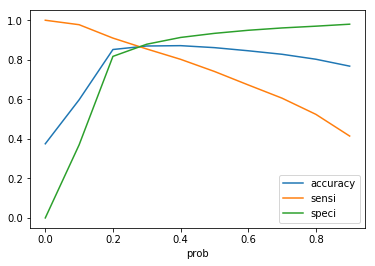

In [69]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [70]:
#MAKING PREDICTIONS ON TEST DATA SET
# Add a constant to X_test
X_test.drop(columns = l,inplace = True)
X_test_sm = sm.add_constant(X_test)
X_test.head()

,std_og_mou_6,std_og_mou_7,std_og_mou_8,total_ic_mou_8,av_rech_amt_data_6,av_rech_amt_data_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g
mobile_number,,,,,,,,,,,,
7000168620,19.94,1207.21,1659.28,92.29,0.0,0.0,0.0,0.0,0.00,495,0.00,0.00
7001817283,1215.94,665.21,883.74,102.96,0.0,154.0,0.0,0.0,230.13,879,52.21,49.57
7000752888,509.63,543.66,519.51,130.89,0.0,69.0,0.0,0.0,0.00,1569,0.00,0.00
7002376830,1.81,4.34,15.81,170.84,0.0,0.0,0.0,0.0,0.00,567,468.87,0.00
7000854746,1331.73,1158.83,1634.23,411.24,0.0,0.0,0.0,0.0,0.00,1067,0.00,0.00


In [71]:
y_test_pred = res.predict(X_test_sm)

In [72]:
y_test_pred = pd.DataFrame(y_test_pred)

In [73]:
# Remove index for both dataframes to append them side by side 

y_test_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [74]:
y_test_pred_final = pd.concat([y_test, y_test_pred],axis=1)

In [75]:
y_test_pred_final= y_test_pred_final.rename(columns = {0 : 'Churn_Prob'})

In [76]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [77]:
y_test_pred_final.head()

,tel_9_churn,Churn_Prob,final_predicted
0,0,0.066105,0
1,1,0.213713,0
2,0,0.124506,0
3,0,0.196796,0
4,0,0.071768,0


In [78]:
metrics.accuracy_score(y_test_pred_final['tel_9_churn'], y_test_pred_final.final_predicted)

0.8688295016921461

### Decision Tree Analysis

In [79]:
tel_df_new.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rev_3_months,tel_9_churn,avg_rech_time,avg_rech_data_time
mobile_number,,,,,,,,,,,,,,,,,,,,,
7001204172,221.338,251.102,508.054,99.91,54.39,310.98,123.31,109.01,71.68,0.00,...,0.0,0.0,2491,0.00,0.00,0.00,327.0,0,32.0,0.0
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.0,0.0,802,57.74,19.38,18.74,1864.0,0,30.0,0.0
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,1.0,1.0,315,21.03,910.65,122.16,336.0,0,33.0,27.0
7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0.0,1.0,2607,0.00,0.00,0.00,431.0,0,35.5,15.5
7001028254,271.699,421.474,364.251,72.41,86.73,71.18,198.84,225.38,132.51,0.00,...,0.0,0.0,3108,1.11,0.22,0.00,352.0,0,37.0,0.0


In [80]:
tel_df_new.reset_index(inplace = True) 
tel_df_new.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rev_3_months,tel_9_churn,avg_rech_time,avg_rech_data_time
0,7001204172,221.338,251.102,508.054,99.91,54.39,310.98,123.31,109.01,71.68,...,0.0,0.0,2491,0.00,0.00,0.00,327.0,0,32.0,0.0
1,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0.0,0.0,802,57.74,19.38,18.74,1864.0,0,30.0,0.0
2,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,1.0,1.0,315,21.03,910.65,122.16,336.0,0,33.0,27.0
3,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,...,0.0,1.0,2607,0.00,0.00,0.00,431.0,0,35.5,15.5
4,7001028254,271.699,421.474,364.251,72.41,86.73,71.18,198.84,225.38,132.51,...,0.0,0.0,3108,1.11,0.22,0.00,352.0,0,37.0,0.0


In [82]:
X = tel_df_new.drop(columns = "tel_9_churn")
y = tel_df_new["tel_9_churn"]

In [83]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(X.columns[0:])
features

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 '

In [85]:
# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

In [86]:
# plotting tree with max_depth=5
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("UsageBasedChurn.pdf")

True

In [87]:
# the pdf with the tree will be written in this directory on your system
import os
os.getcwd()

'C:\\Users\\kirti singhania\\Machine Learning 2'

You will find the output PDF file in your user folder under C drive, if you are using default directory for Anaconda